In [1]:
# Imports
import numpy as np
import pandas as pd
from scipy.spatial import distance

# from translate_csv_functions import translate_csv

# from sklearn.preprocessing import MinMaxScaler
# pip3 install pandas ipython jupyter

## Preprocesado csv de las encuestas

Descargar como CSV cada uno de los archivos de las respuestas en la carpeta ```./encuestas``` con el nombre normal: 
```
Students: 
https://docs.google.com/spreadsheets/d/1tESGSKhoOWekvYnvMypd6t1eFXN_av8F60wyxPkbUb8/edit#gid=1960323408

COmpany: 
https://docs.google.com/spreadsheets/d/1AHnY6-E9w__BNcWqiS2rkqYbNlmqaU6nPFiPHDDKRfI/edit#gid=730113545

Encuestas
https://docs.google.com/forms/d/1JOjjmV1W-ay7h00wVtpcQzD6FHNJU8Qg6RRz1ptDN4Q/edit
https://docs.google.com/forms/d/1w85z6lqZdQfByTMiefqUcth16-F9NnLHuZuh9CVHxyU/edit#responses
```

In [2]:
COMPANIES_ENCUESTAS_CSV = './encuestas/Web - Ironhack Matchmaking Company Form (Responses) - Form Responses 1.csv'
STUDENTS_ENCUESTAS_CSV = './encuestas/Web - Ironhack Matchmaking Student Form (Responses) - Form Responses 1.csv'


DIC_COMPANIES = {
    "What is the name of your company?": "name", 
    'Does your company have specific language requirements for this position? [English]': 'english', 
    'Does your company have specific language requirements for this position? [Spanish]': 'spanish', 
    'Does your company have specific language requirements for this position? [Portuguese]': 'portuguese', 
    'Does your company have specific language requirements for this position? [French]': 'french', 
    'Does your company have specific language requirements for this position? [Dutch]': 'dutch', 
    'Does your company have specific language requirements for this position? [Catalan]': 'catalan', 
    'Where will this position be located?': 'location', 
    'Regarding remote working, how many days a week could the employee work off site?': 'offsite', 
    'On a scale from 1 to 10, how much time will the employee be spending working on back end and front end?': 'position', 
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Java]': 'java', 
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [C# / ASP.net]': 'caspnet',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Python]': 'python',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [PHP]': 'php',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [SQL]': 'sql',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Angular (Typescript generation)]': 'angular',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Vue]': 'vue',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Firebase]': 'firebase',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [AWS]': 'aws',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Docker / Kubernetes]': 'dockerkubernetes',
    'From this list, please rank these 3 soft skills in order of importance for this position [Motivation and ability to overcome problems: employee has a passionate, can-do attitude and proactively looks for solutions to every problem they encounter]': 'motivation',
    'From this list, please rank these 3 soft skills in order of importance for this position [Coachability: Employee is receptive and actively listens and acts on feedback received]': 'coachability',
    'From this list, please rank these 3 soft skills in order of importance for this position [Teamwork: Employee is able to receive and provide value in a team environment]\r': 'teamwork' # El \r del final es para que sirva de terminador
    }

LANGUAGES = ['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan']
HARDSKILLS = ['java', 'caspnet', 'python', 'php', 'sql', 'angular', 
              'vue', 'firebase', 'aws', 'dockerkubernetes']

def translate_language(x): 
    RESPONSES_LANGUAGE = [
        'Must be able to read basic documentation', 
        'Must be able to read documentation and have an informal conversation', 
        'Must be able to read documentation and communicate in a meeting', 
        'Can work in full capacity in this language'
    ]
    return 0 if x not in RESPONSES_LANGUAGE else RESPONSES_LANGUAGE.index(x) + 1 

def translate_location(x): 
    RESPONSES_LOCATION = [
        'In the city where the campus is located', 
        'In the country where the campus is located', 
        'In a city in another country'
    ]
    return 0 if x not in RESPONSES_LOCATION else RESPONSES_LOCATION.index(x) + 1

def translate_offsite(x): 
    RESPONSES_OFFSITE = [
        "100% office-based job. We're not keen on remote working.", 
        '1-2 Days a week', 
        "3+ Days. It's up to the employee", 
        "100% remote-based job. No physical office."
    ]
    return 0 if x not in RESPONSES_OFFSITE else RESPONSES_OFFSITE.index(x) + 1

def translate_position(x): 
    return int(x)

def translate_hardskills(x): 
    RESPONSES_HARDSKILLS = [
        'Nice to have: They should have a basic knowledge', 
        'Must have: Must be able to work with the technology on a regular basis'
    ]
    return 0 if x not in RESPONSES_HARDSKILLS else RESPONSES_HARDSKILLS.index(x) + 1 

def translate_csv(path, dic): 
    # open and setup columns
    df = pd.read_csv(path, sep=',', index_col=0, lineterminator='\n')
    df.rename(index=str, columns=dic, inplace=True)
    df.index = df.name
    df.drop(columns=['name'], axis=1, inplace=True)
    
    # languages
    for language in LANGUAGES: 
        df[language] = df[language].apply(translate_language)
    
    # location
    df['location'] = df['location'].apply(translate_location)    
    
    # offsite
    df['offsite'] = df['offsite'].apply(translate_offsite)
    
    # position
    df['position'] = df['position'].apply(translate_position)
    
    # hardskills
    for hardskill in HARDSKILLS: 
        df[hardskill] = df[hardskill].apply(translate_hardskills)
    
    return df



In [3]:

companies_enc = translate_csv(path=COMPANIES_ENCUESTAS_CSV, dic=DIC_COMPANIES)
display(companies_enc.head(10))
display(companies_enc.dtypes)
COMPANIES_CLEAN_CSV = './encuestas/companies.csv'
companies_enc.to_csv(COMPANIES_CLEAN_CSV, index=True)

companies_enc.columns

,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,php,sql,angular,vue,firebase,aws,dockerkubernetes,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Company A,3,4,4,0,0,0,2,2,4,0,...,0,0,0,0,0,0,0,1,2,3
Company B,3,4,4,0,0,0,3,1,8,0,...,0,0,2,0,0,0,0,2,3,1
Company C,4,4,4,0,2,0,3,2,3,0,...,0,0,0,0,0,0,0,1,2,3
Company Falsa,4,4,4,4,4,4,3,4,10,2,...,2,2,2,2,2,2,2,3,2,1
Company Falsa 2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,3
Company Falsa 3,1,2,3,4,3,2,1,2,5,1,...,2,0,0,1,2,0,0,1,2,3
COMPANY MAX,4,4,4,4,4,4,3,4,10,2,...,2,2,2,2,2,2,2,3,2,1


english             int64
spanish             int64
portuguese          int64
french              int64
dutch               int64
catalan             int64
location            int64
offsite             int64
position            int64
java                int64
caspnet             int64
python              int64
php                 int64
sql                 int64
angular             int64
vue                 int64
firebase            int64
aws                 int64
dockerkubernetes    int64
motivation          int64
coachability        int64
teamwork            int64
dtype: object

Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
       'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
       'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
       'motivation', 'coachability', 'teamwork'],
      dtype='object')

In [4]:
DIC_STUDENTS = {
    "What is your full name?": "name", 
    'What is your level in the following languages? [English]': 'english', 
    'What is your level in the following languages? [Spanish]': 'spanish', 
    'What is your level in the following languages? [Portuguese]': 'portuguese', 
    'What is your level in the following languages? [French]': 'french', 
    'What is your level in the following languages? [Dutch]': 'dutch', 
    'What is your level in the following languages? [Catalan]': 'catalan', 
    'What are your preferences for job location?': 'location', 
    'What kind of roles are you open to in terms of remote working?': 'offsite', 
    'In you role, how would you prefer to allocate your time between working on backend and working on frontend?': 'position', 
    'Aside from the ones covered in our curriculum (MERN Stack), do you have additional specific hard-skills? [Java]': 'java', 
    'Aside from the ones covered in our curriculum (MERN Stack), do you have additional specific hard-skills? [C# / ASP.net]': 'caspnet',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have additional specific hard-skills? [Python]': 'python',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have additional specific hard-skills? [PHP]': 'php',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have additional specific hard-skills? [SQL]': 'sql',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have additional specific hard-skills? [Angular (Typescript generation)]': 'angular',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have additional specific hard-skills? [VueJS]': 'vue',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have additional specific hard-skills? [Firebase]': 'firebase',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have additional specific hard-skills? [AWS]': 'aws',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have additional specific hard-skills? [Docker / Kubernetes]': 'dockerkubernetes',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have additional specific hard-skills? [Design Tools (Photoshop, Illustrator...)]': 'todrop', # esta es nueva
    "From this list of soft skills, please rank in order the ones you consider you're stronger at [Motivation and ability to overcome problems: I am passionate, have a can-do attitude and proactively look for solutions to every problem.]": 'motivation',
    "From this list of soft skills, please rank in order the ones you consider you're stronger at [Coachability: I am receptive and actively listen and act on the feedback I receive]": 'coachability',
    "From this list of soft skills, please rank in order the ones you consider you're stronger at [Teamwork: I'm able to receive and provide value in a team environment]\r": 'teamwork' # El \r del final es para que sirva de terminador
    }

students_enc = translate_csv(path=STUDENTS_ENCUESTAS_CSV, dic=DIC_STUDENTS)
students_enc.drop(columns=['todrop'], axis=1, inplace=True)
display(students_enc.head(15))
display(students_enc.dtypes)
STUDENTS_CLEAN_CSV = './encuestas/students.csv'
students_enc.to_csv(STUDENTS_CLEAN_CSV, index=True)

students_enc.columns

,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,php,sql,angular,vue,firebase,aws,dockerkubernetes,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Student A,4,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,1,2,3
Student C,0,4,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,3,2,1
Student B,4,4,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,2,1,3
Student Falso 1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,2,3
Student Falso 2,4,4,4,4,4,4,0,4,10,0,...,0,0,0,0,0,0,0,3,2,1
Student Falso 3,0,0,0,4,0,0,1,2,5,0,...,0,0,0,0,0,0,0,1,2,3
Student Falso 4,0,0,0,0,0,0,1,0,2,0,...,0,0,0,0,0,0,0,1,2,3
Nombre Falso 1,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,1,2,3
Nombre Falso 2,0,0,0,0,0,0,1,2,4,0,...,0,0,0,0,0,0,0,3,2,1


english             int64
spanish             int64
portuguese          int64
french              int64
dutch               int64
catalan             int64
location            int64
offsite             int64
position            int64
java                int64
caspnet             int64
python              int64
php                 int64
sql                 int64
angular             int64
vue                 int64
firebase            int64
aws                 int64
dockerkubernetes    int64
motivation          int64
coachability        int64
teamwork            int64
dtype: object

Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
       'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
       'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
       'motivation', 'coachability', 'teamwork'],
      dtype='object')

In [5]:
# students_enc.head(), companies_enc.head()

In [6]:
companies_enc.columns, companies_enc.columns

(Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
        'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
        'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
        'motivation', 'coachability', 'teamwork'],
       dtype='object'),
 Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
        'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
        'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
        'motivation', 'coachability', 'teamwork'],
       dtype='object'))

## Tratado de los CSVs

In [7]:
# Alumnos

STUDENTS_CSV = STUDENTS_CLEAN_CSV # antes -> './input/students.csv'
COMPANIES_CSV = COMPANIES_CLEAN_CSV # antes -> './input/companies.csv'

def csv2dataframe(path): 
    return pd.read_csv(path, sep=',', index_col=0, lineterminator='\n')

def adquisition(): 
    students = csv2dataframe(STUDENTS_CSV)
    companies = csv2dataframe(COMPANIES_CSV)
    return students, companies

students, companies = adquisition()

display(students), display(companies)
display(len(students.columns))

,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,php,sql,angular,vue,firebase,aws,dockerkubernetes,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Student A,4,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,1,2,3
Student C,0,4,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,3,2,1
Student B,4,4,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,2,1,3
Student Falso 1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,2,3
Student Falso 2,4,4,4,4,4,4,0,4,10,0,...,0,0,0,0,0,0,0,3,2,1
Student Falso 3,0,0,0,4,0,0,1,2,5,0,...,0,0,0,0,0,0,0,1,2,3
Student Falso 4,0,0,0,0,0,0,1,0,2,0,...,0,0,0,0,0,0,0,1,2,3
Nombre Falso 1,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,1,2,3
Nombre Falso 2,0,0,0,0,0,0,1,2,4,0,...,0,0,0,0,0,0,0,3,2,1


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,php,sql,angular,vue,firebase,aws,dockerkubernetes,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Company A,3,4,4,0,0,0,2,2,4,0,...,0,0,0,0,0,0,0,1,2,3
Company B,3,4,4,0,0,0,3,1,8,0,...,0,0,2,0,0,0,0,2,3,1
Company C,4,4,4,0,2,0,3,2,3,0,...,0,0,0,0,0,0,0,1,2,3
Company Falsa,4,4,4,4,4,4,3,4,10,2,...,2,2,2,2,2,2,2,3,2,1
Company Falsa 2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,3
Company Falsa 3,1,2,3,4,3,2,1,2,5,1,...,2,0,0,1,2,0,0,1,2,3
COMPANY MAX,4,4,4,4,4,4,3,4,10,2,...,2,2,2,2,2,2,2,3,2,1


22

In [8]:
# normalizacion. Por columnas en alumnos o empresas hay un 0.0 y un 1.0

def normalize_2dfs(students, companies): 
    
    # min(s, c, 0) -> para que no de NaN
    mins = [min(s, c, 0) for s, c in zip(students.min(), companies.min())]
    students = students-mins
    companies = companies-mins
    
    maxs = [max(s, c, 1) for s, c in zip(students.max(), companies.max())]
    students = students/maxs
    companies = companies/maxs
    
    return students, companies

students_norm, companies_norm = normalize_2dfs(students, companies)

display(students), display(companies)
display(students_norm), display(companies_norm)

,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,php,sql,angular,vue,firebase,aws,dockerkubernetes,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Student A,4,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,1,2,3
Student C,0,4,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,3,2,1
Student B,4,4,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,2,1,3
Student Falso 1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,2,3
Student Falso 2,4,4,4,4,4,4,0,4,10,0,...,0,0,0,0,0,0,0,3,2,1
Student Falso 3,0,0,0,4,0,0,1,2,5,0,...,0,0,0,0,0,0,0,1,2,3
Student Falso 4,0,0,0,0,0,0,1,0,2,0,...,0,0,0,0,0,0,0,1,2,3
Nombre Falso 1,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,1,2,3
Nombre Falso 2,0,0,0,0,0,0,1,2,4,0,...,0,0,0,0,0,0,0,3,2,1


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,php,sql,angular,vue,firebase,aws,dockerkubernetes,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Company A,3,4,4,0,0,0,2,2,4,0,...,0,0,0,0,0,0,0,1,2,3
Company B,3,4,4,0,0,0,3,1,8,0,...,0,0,2,0,0,0,0,2,3,1
Company C,4,4,4,0,2,0,3,2,3,0,...,0,0,0,0,0,0,0,1,2,3
Company Falsa,4,4,4,4,4,4,3,4,10,2,...,2,2,2,2,2,2,2,3,2,1
Company Falsa 2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,3
Company Falsa 3,1,2,3,4,3,2,1,2,5,1,...,2,0,0,1,2,0,0,1,2,3
COMPANY MAX,4,4,4,4,4,4,3,4,10,2,...,2,2,2,2,2,2,2,3,2,1


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,php,sql,angular,vue,firebase,aws,dockerkubernetes,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Student A,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,1.000000
Student C,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.666667,0.333333
Student B,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,1.000000
Student Falso 1,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,1.000000
Student Falso 2,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.666667,0.333333
Student Falso 3,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.5,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,1.000000
Student Falso 4,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,1.000000
Nombre Falso 1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,1.000000
Nombre Falso 2,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.5,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.666667,0.333333


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,php,sql,angular,vue,firebase,aws,dockerkubernetes,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Company A,0.75,1.00,1.00,0.00,0.00,0.00,0.666667,0.50,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,1.000000
Company B,0.75,1.00,1.00,0.00,0.00,0.00,1.000000,0.25,0.8,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,1.000000,0.333333
Company C,1.00,1.00,1.00,0.00,0.50,0.00,1.000000,0.50,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,1.000000
Company Falsa,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.666667,0.333333
Company Falsa 2,0.25,0.25,0.25,0.25,0.25,0.25,0.333333,0.25,0.1,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.333333,0.666667,1.000000
Company Falsa 3,0.25,0.50,0.75,1.00,0.75,0.50,0.333333,0.50,0.5,0.5,...,1.0,0.0,0.0,0.5,1.0,0.0,0.0,0.333333,0.666667,1.000000
COMPANY MAX,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.666667,0.333333


(None, None)

In [9]:
# Matching

# PESOS = (alumnos.columns)

P = [2,1,1,1,3,1,1,1,1,5, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 1 ,1, 1, 1]
W = {col: p for col, p in zip(students_norm.columns, P)}


def calc_dist(s_array, c_array, weights_val): 
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine
    return calc_match(distance.euclidean(s_array, c_array, weights_val))

def calc_match(distance): 
    return 1/(1+distance)

def match(student, company, weights=W): 
    return calc_dist(student, company, list(weights.values()))

In [10]:
# match(students_norm.loc['alumno1'], companies_norm.loc['empresa1'])
W

{'english': 2,
 'spanish': 1,
 'portuguese': 1,
 'french': 1,
 'dutch': 3,
 'catalan': 1,
 'location': 1,
 'offsite': 1,
 'position': 1,
 'java': 5,
 'caspnet': 1,
 'python': 1,
 'php': 1,
 'sql': 1,
 'angular': 1,
 'vue': 1,
 'firebase': 1,
 'aws': 1,
 'dockerkubernetes': 1,
 'motivation': 1,
 'coachability': 1,
 'teamwork': 1}

# Emparejamiento

En cada ronda se crea una pareja alumno-empresa empezando por el mejor %. Luego se pasa al siguente alumno. Si la empresa que hacía mejor match es la del caso anterior, pasa a su segundo mejor match, etc. 

En cada ronda se cambia el estudiante que elige primero, entre los que no han ido primeros

In [11]:
# !jupyter kernelspec list
# import sys
# sys.path

In [12]:
# create dataframe de tamañ0 SxC

matching = pd.DataFrame(np.zeros((len(students), len(companies))) , columns=companies.index, index=students.index)
matching.head()


name,Company A,Company B,Company C,Company Falsa,Company Falsa 2,Company Falsa 3,COMPANY MAX
name,,,,,,,
Student A,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Student C,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Student B,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Student Falso 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Student Falso 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
matching.index, matching.columns

(Index(['Student A', 'Student C', 'Student B', 'Student Falso 1',
        'Student Falso 2', 'Student Falso 3', 'Student Falso 4',
        'Nombre Falso 1', 'Nombre Falso 2', 'TODO MAX', 'Nombre Falso 3',
        'Nombre Falso 4', 'Nombre Falso 5'],
       dtype='object', name='name'),
 Index(['Company A', 'Company B', 'Company C', 'Company Falsa',
        'Company Falsa 2', 'Company Falsa 3', 'COMPANY MAX'],
       dtype='object', name='name'))

In [28]:
# matching.loc['alumno1', 'empresa3']

def calculate_match(matching, df1, df2): 
    # matching = pd.DataFrame(np.zeros((len(students), len(companies))) , columns=companies.index, index=students.index)

    for a in matching.index: 
        for c in matching.columns:
            print()
            print('{} {}'.format(a, c))
            print(list(df1.loc[a]))
            print(list(df2.loc[c]))
            
            matching.loc[a, c] = match(df1.loc[a], df2.loc[c])
    return matching

matching = calculate_match(matching, students_norm, companies_norm)

# matching es una matriz de elementos entre [0, 1]
# matching.min().min(), matching.max().max()

matching


Student A Company A
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0]
[0.75, 1.0, 1.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.5, 0.4, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0]

Student A Company B
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0]
[0.75, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.25, 0.8, 0.0, 0.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 1.0, 0.3333333333333333]

Student A Company C
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0]
[1.0, 1.0, 1.0, 0.0, 0.5, 0.0, 1.0, 0.5, 0.3, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0]

Student A Company Falsa
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.

Nombre Falso 4 COMPANY MAX
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.5, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.6666666666666666, 0.3333333333333333]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 0.3333333333333333]

Nombre Falso 5 Company A
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.5, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.6666666666666666, 0.3333333333333333]
[0.75, 1.0, 1.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.5, 0.4, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0]

Nombre Falso 5 Company B
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.5, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.6666666666666666, 0.3333333333333333]
[0.75, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.25, 0.8, 0.0, 0.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 1.0, 0.3333333333333333]

Nombre Fals

name,Company A,Company B,Company C,Company Falsa,Company Falsa 2,Company Falsa 3,COMPANY MAX
name,,,,,,,
Student A,0.354367,0.303548,0.326373,0.168796,0.302312,0.240289,0.168796
Student C,0.327455,0.310966,0.287548,0.168103,0.295847,0.241033,0.168103
Student B,0.385001,0.322422,0.347936,0.172797,0.287892,0.238376,0.172797
Student Falso 1,0.331242,0.289238,0.294579,0.163584,0.329923,0.249636,0.163584
Student Falso 2,0.266591,0.258832,0.296513,0.205213,0.232190,0.259711,0.205213
Student Falso 3,0.314608,0.279599,0.281972,0.170012,0.313729,0.265863,0.170012
Student Falso 4,0.332611,0.291480,0.295125,0.164031,0.329655,0.250365,0.164031
Nombre Falso 1,0.331152,0.284031,0.289898,0.164949,0.325958,0.252369,0.164949
Nombre Falso 2,0.317402,0.303548,0.284204,0.169361,0.306826,0.244733,0.169361


In [15]:
# create csv de pruebas

df_pruebas = matching.copy()     
df1 = df_pruebas.iloc[:, :15].copy() # 30x15
df2 = df_pruebas.head(15).copy()     # 15x30
df3 = df_pruebas.copy()              # 30x30

df1.shape, df2.shape, df3.shape

((13, 7), (13, 7), (13, 7))

# Grafos

In [16]:
import networkx as nx
import matplotlib

# https://networkx.github.io/documentation/networkx-1.10/reference/introduction.html

def create_graph(df): 
    G_res=nx.Graph()
    for a in df.index: 
        for e in df.columns: 
            G_res.add_edge(a,e,weight=df.loc[a][e])
    return G_res

def plot_bipartite_graph(G, set_X, set_Y): 
    X, Y = set_X, set_Y # df1.index, df1.columns
    pos = dict()
    pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
    pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
    nx.draw(G, pos=pos)

    '''
def get_best_match2(G, node): 
    # sort por peso DESCENCENTE
    for edge in sorted(G.edges(data=True), key=lambda x: - x[2]['weight']):
        if node in edge: 
            return edge
'''    
# sort por peso DESCENCENTE

def get_best_match(G, node, used): 
    # sort por peso DESCENCENTE
    for edge in sorted(G.edges(data=True), key=lambda x: - x[2]['weight']):
        if node in edge and all(u not in edge for u in used): 
            return edge
 
    


# favoreciendo empresas. más alumnos que empresas 

In [17]:
# node1, node2, w

df_pruebas

name,Company A,Company B,Company C,Company Falsa,Company Falsa 2,Company Falsa 3,COMPANY MAX
name,,,,,,,
Student A,0.354367,0.303548,0.326373,0.168796,0.302312,0.240289,0.168796
Student C,0.327455,0.310966,0.287548,0.168103,0.295847,0.241033,0.168103
Student B,0.385001,0.322422,0.347936,0.172797,0.287892,0.238376,0.172797
Student Falso 1,0.331242,0.289238,0.294579,0.163584,0.329923,0.249636,0.163584
Student Falso 2,0.266591,0.258832,0.296513,0.205213,0.232190,0.259711,0.205213
Student Falso 3,0.314608,0.279599,0.281972,0.170012,0.313729,0.265863,0.170012
Student Falso 4,0.332611,0.291480,0.295125,0.164031,0.329655,0.250365,0.164031
Nombre Falso 1,0.331152,0.284031,0.289898,0.164949,0.325958,0.252369,0.164949
Nombre Falso 2,0.317402,0.303548,0.284204,0.169361,0.306826,0.244733,0.169361


In [18]:
G = create_graph(df_pruebas) # G = create_graph(df1)
students = df1.index
companies = df1.columns

plot_bipartite_graph(G, students, companies)

node1, node2, w = get_best_match(G, 'Company A', [])
node1, node2, w

/home/alberto/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


('Company A', 'Student B', {'weight': 0.3850013172507184})

In [19]:
companies

Index(['Company A', 'Company B', 'Company C', 'Company Falsa',
       'Company Falsa 2', 'Company Falsa 3', 'COMPANY MAX'],
      dtype='object', name='name')

In [20]:
RONDAS = 3 #10
MESAS = min(len(students), len(companies))
MESAS

rondas = []

for ronda in range(RONDAS): 
    aux = []
    used = []
    for company in companies: 
        
        node1, node2, w = get_best_match(G, company, used)
        # aux.append((node1, node2, w))
        G.remove_edge(node1, node2)
        
        if node1 == company: 
            used.append(node2)
            aux.append((node1, node2, w))
        else: 
            used.append(node1)
            aux.append((node2, node1, w))
    rondas.append(aux)
    print(rondas)
    
rondas

[[('Company A', 'Student B', {'weight': 0.3850013172507184}), ('Company B', 'Student C', {'weight': 0.3109656469047956}), ('Company C', 'Student A', {'weight': 0.3263732343727084}), ('Company Falsa', 'Student Falso 2', {'weight': 0.20521309615767264}), ('Company Falsa 2', 'Student Falso 1', {'weight': 0.3299230723708768}), ('Company Falsa 3', 'Student Falso 3', {'weight': 0.26586267989385887}), ('COMPANY MAX', 'TODO MAX', {'weight': 0.20521309615767264})]]
[[('Company A', 'Student B', {'weight': 0.3850013172507184}), ('Company B', 'Student C', {'weight': 0.3109656469047956}), ('Company C', 'Student A', {'weight': 0.3263732343727084}), ('Company Falsa', 'Student Falso 2', {'weight': 0.20521309615767264}), ('Company Falsa 2', 'Student Falso 1', {'weight': 0.3299230723708768}), ('Company Falsa 3', 'Student Falso 3', {'weight': 0.26586267989385887}), ('COMPANY MAX', 'TODO MAX', {'weight': 0.20521309615767264})], [('Company A', 'Student A', {'weight': 0.3543668661943274}), ('Company B', 'St

[[('Company A', 'Student B', {'weight': 0.3850013172507184}),
  ('Company B', 'Student C', {'weight': 0.3109656469047956}),
  ('Company C', 'Student A', {'weight': 0.3263732343727084}),
  ('Company Falsa', 'Student Falso 2', {'weight': 0.20521309615767264}),
  ('Company Falsa 2', 'Student Falso 1', {'weight': 0.3299230723708768}),
  ('Company Falsa 3', 'Student Falso 3', {'weight': 0.26586267989385887}),
  ('COMPANY MAX', 'TODO MAX', {'weight': 0.20521309615767264})],
 [('Company A', 'Student A', {'weight': 0.3543668661943274}),
  ('Company B', 'Student B', {'weight': 0.32242249032721787}),
  ('Company C', 'Student Falso 2', {'weight': 0.29651348005590716}),
  ('Company Falsa', 'TODO MAX', {'weight': 0.20521309615767264}),
  ('Company Falsa 2', 'Student Falso 4', {'weight': 0.3296554834980145}),
  ('Company Falsa 3', 'Nombre Falso 1', {'weight': 0.2523691031505982}),
  ('COMPANY MAX', 'Student Falso 3', {'weight': 0.17001194913688772})],
 [('Company A', 'Student Falso 4', {'weight': 0.

# favorecemos a los estudiantes. más alumnos que empresas

('Company A', 'Student B', {'weight': 0.3850013172507184})

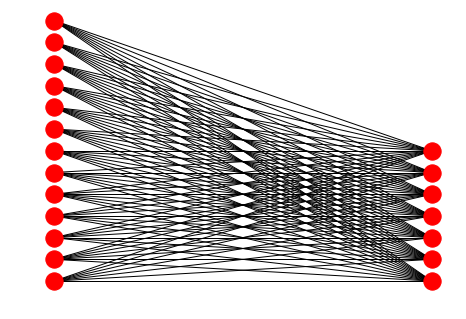

In [21]:
G = create_graph(df1)
students = df1.index
companies = df1.columns

plot_bipartite_graph(G, students, companies)

node1, node2, w = get_best_match(G, 'Company A', [])
node1, node2, w

In [22]:
MAX_RONDAS = 10

RONDAS = min(MAX_RONDAS, len(companies)) 

rondas = []
print(students)

student_queue = list(students) * RONDAS # vamos a recorrer la lista para ir emparejando
print(student_queue)

for i, student in enumerate(student_queue): 
    aux = []
    used = []
    while True: 
        student = student_queue[i]
        i += 1
        node1, node2, w = get_best_match(G, student, used)
        # aux.append((node1, node2, w))
        G.remove_edge(node1, node2)
    
        # el nodo1 es la compañía (nodo1 no es estudiante)
        if node1 != student: 
            used.append(node1)
            aux.append((node1, node2, w))
        # nodo2 es la compañía
        else: 
            used.append(node2)
            aux.append((node2, node1, w))
        # print(used)
            
        if len(used) == len(companies): 
            break  
            
    rondas.append(aux)

    if len(rondas) == RONDAS: 
        break
    

    
rondas

Index(['Student A', 'Student C', 'Student B', 'Student Falso 1',
       'Student Falso 2', 'Student Falso 3', 'Student Falso 4',
       'Nombre Falso 1', 'Nombre Falso 2', 'TODO MAX', 'Nombre Falso 3',
       'Nombre Falso 4', 'Nombre Falso 5'],
      dtype='object', name='name')
['Student A', 'Student C', 'Student B', 'Student Falso 1', 'Student Falso 2', 'Student Falso 3', 'Student Falso 4', 'Nombre Falso 1', 'Nombre Falso 2', 'TODO MAX', 'Nombre Falso 3', 'Nombre Falso 4', 'Nombre Falso 5', 'Student A', 'Student C', 'Student B', 'Student Falso 1', 'Student Falso 2', 'Student Falso 3', 'Student Falso 4', 'Nombre Falso 1', 'Nombre Falso 2', 'TODO MAX', 'Nombre Falso 3', 'Nombre Falso 4', 'Nombre Falso 5', 'Student A', 'Student C', 'Student B', 'Student Falso 1', 'Student Falso 2', 'Student Falso 3', 'Student Falso 4', 'Nombre Falso 1', 'Nombre Falso 2', 'TODO MAX', 'Nombre Falso 3', 'Nombre Falso 4', 'Nombre Falso 5', 'Student A', 'Student C', 'Student B', 'Student Falso 1', 'Student 

[[('Company A', 'Student A', {'weight': 0.3543668661943274}),
  ('Company B', 'Student C', {'weight': 0.3109656469047956}),
  ('Company C', 'Student B', {'weight': 0.3479359290687624}),
  ('Company Falsa 2', 'Student Falso 1', {'weight': 0.3299230723708768}),
  ('Company Falsa 3', 'Student Falso 2', {'weight': 0.2597106754733817}),
  ('Company Falsa', 'Student Falso 3', {'weight': 0.17001194913688772}),
  ('COMPANY MAX', 'Student Falso 4', {'weight': 0.1640311249718782})],
 [('Company A', 'Student C', {'weight': 0.32745463222264953}),
  ('Company B', 'Student B', {'weight': 0.32242249032721787}),
  ('Company C', 'Student Falso 1', {'weight': 0.29457944301324035}),
  ('Company Falsa 2', 'Student Falso 2', {'weight': 0.2321903525674172}),
  ('Company Falsa 3', 'Student Falso 3', {'weight': 0.26586267989385887}),
  ('Company Falsa', 'Student Falso 4', {'weight': 0.1640311249718782}),
  ('COMPANY MAX', 'Nombre Falso 1', {'weight': 0.16494850026120464})],
 [('Company A', 'Student B', {'weig

In [23]:
def rondas2string(rondas):
    res = ''
    for i, ronda in enumerate(rondas): 
        res += '\n\nRonda {}'.format(i)
        for c, s, w in ronda: 
            res += '\nCompany: {} -> Student: {} -> Matching: {}'.format(c, s, w)
        
    return res
        
        
text = rondas2string(rondas)

with open("Rondas.txt", "w") as f:
    f.write(text)